In [252]:
from scipy import stats
#from google.colab import drive
import pandas as pd
import scipy.interpolate
import numpy as np

#drive.mount('/content/drive')
#df=pd.read_csv("../data/all_causal_extrapolated.csv")
df=pd.read_csv("../data/API_IND_DS2_en_csv_v2_4907770.csv")

In [253]:
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,India,IND,"Internally displaced persons, total displaced ...",VC.IDP.TOCV,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000e+06,5.260000e+05,8.540000e+05,6.120000e+05,7.960000e+05,8.060000e+05,4.790000e+05,4.700000e+05,4.730000e+05,5.060000e+05
1,India,IND,Travel services (% of commercial service exports),TX.VAL.TRVL.ZS.WT,NaN,NaN,NaN,NaN,NaN,NaN,...,1.239164e+01,1.237169e+01,1.257876e+01,1.349412e+01,1.390981e+01,1.481815e+01,1.398202e+01,1.434676e+01,6.437810e+00,3.606469e+00
2,India,IND,Commercial service exports (current US$),TX.VAL.SERV.CD.WT,NaN,NaN,NaN,NaN,NaN,NaN,...,1.450290e+11,1.487030e+11,1.566140e+11,1.557170e+11,1.612340e+11,1.846730e+11,2.043230e+11,2.141280e+11,2.024920e+11,2.398540e+11
3,India,IND,Merchandise exports by the reporting economy (...,TX.VAL.MRCH.WL.CD,1.313500e+09,1.382400e+09,1.389400e+09,1.576300e+09,1.691700e+09,1.651500e+09,...,2.971970e+11,3.150900e+11,3.177190e+11,2.661630e+11,2.618620e+11,2.962120e+11,3.232690e+11,3.248630e+11,2.756000e+11,NaN
4,India,IND,Merchandise exports to low- and middle-income ...,TX.VAL.MRCH.R4.ZS,3.989341e+00,3.949653e+00,4.073701e+00,3.774662e+00,3.753621e+00,5.292159e+00,...,3.983911e+00,4.485823e+00,4.403231e+00,3.678743e+00,3.290252e+00,3.197936e+00,3.663655e+00,4.079594e+00,3.387545e+00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437,India,IND,Land area (sq. km),AG.LND.TOTL.K2,NaN,2.973190e+06,2.973190e+06,2.973190e+06,2.973190e+06,2.973190e+06,...,2.973190e+06,2.973190e+06,2.973190e+06,2.973190e+06,2.973190e+06,2.973190e+06,2.973190e+06,2.973190e+06,2.973190e+06,NaN
1438,India,IND,Forest area (sq. km),AG.LND.FRST.K2,NaN,NaN,NaN,NaN,NaN,NaN,...,7.002880e+05,7.029520e+05,7.056160e+05,7.082800e+05,7.109440e+05,7.136080e+05,7.162720e+05,7.189360e+05,7.216000e+05,NaN
1439,India,IND,Rural land area where elevation is below 5 met...,AG.LND.EL5M.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.026332e+00,NaN,NaN,NaN,NaN,NaN,NaN
1440,India,IND,Arable land (% of land area),AG.LND.ARBL.ZS,NaN,5.240365e+01,5.270433e+01,5.296332e+01,5.305144e+01,5.321422e+01,...,5.265254e+01,5.261756e+01,5.262462e+01,5.260781e+01,5.257552e+01,5.243363e+01,5.229330e+01,5.225669e+01,5.225669e+01,NaN


In [254]:
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [255]:
df[df['Indicator Name'] == 'GNI growth (annual %)']

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
810,India,IND,GNI growth (annual %),NY.GNP.MKTP.KD.ZG,NaN,3.624446,2.903355,6.043226,7.407094,-2.691398,...,5.137353,6.31279,7.494875,8.018965,7.299468,7.823743,6.467465,3.860894,-6.968274,8.423118


In [256]:
df[df['Indicator Name'] == 'GNI per capita growth (annual %)']

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1180,India,IND,GNI per capita growth (annual %),NY.GNP.PCAP.KD.ZG,NaN,1.257019,0.525845,3.601059,4.911229,-4.838299,...,3.749293,4.937976,6.154775,6.718548,6.99407,5.637504,5.324194,2.797243,-7.882588,7.610478


In [341]:
# if all tweets already saved elsewhere
df = pd.read_csv("../data/final_twitter_data.csv",error_bad_lines=False,lineterminator='\n',delimiter='\t')
df['topic'] = "all"

In [342]:
df.head()

,created_at,author_id,lang,text,id,public_metrics,withheld,script_lang,translated_text,POS,LID,CMI,Langugage_hueristic,follower_count,topic
0,2019-10-31T00:56:05.000Z,8.395295e+17,hi,"अखंड भारत के निर्माता, लोहपुरुष, भारतीय सिविल ...",1.189708e+18,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",NaN,hindi,"akhand bhaarat key nirmaata, lohpurush, bhaart...","{""akhand"": ""ADJ"", ""bhaarat"": ""PART"", ""key"": ""A...","{""akhand"": ""ne"", ""bhaarat"": ""hin"", ""key"": ""hin...",0.517241,Code-mixed,NaN,all
1,2019-10-17T16:39:44.000Z,8.395295e+17,hi,"""हर गुनाह कबूल है हमें,\n बस, सजा देने वाला बे...",1.184872e+18,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",NaN,NaN,"""harr gunah kabool hai hamein,\n buss, sajaa d...","{""\"""": ""X"", ""harr"": ""ADJ"", ""gunah"": ""VERB"", ""k...","{""\"""": ""other"", ""harr"": ""hin"", ""gunah"": ""hin"",...",0.611111,Code-mixed,NaN,all
2,2019-11-26T01:39:58.000Z,8.395295e+17,hi,26/11 मुंबई हमले की आठवीं बरसी पर हमले में शही...,1.199141e+18,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",NaN,hindi,26/11 mumbai hamale kee aathvin barsi parr ham...,"{""26"": ""NUM"", ""/"": ""X"", ""11"": ""NUM"", ""mumbai"":...","{""26"": ""other"", ""/"": ""other"", ""11"": ""other"", ""...",0.645161,Code-mixed,NaN,all
3,2019-12-10T08:28:11.000Z,8.395295e+17,hi,"आज़ादी, समानता और सम्मान का अधिकार ही मानवता क...",1.204317e+18,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",NaN,hindi,"aazaadi, samaantaa aur sammaan kaa adhikaar he...","{""aazaadi"": ""PART"", "","": ""X"", ""samaantaa"": ""PA...","{""aazaadi"": ""hin"", "","": ""other"", ""samaantaa"": ...",0.659091,Code-mixed,NaN,all
4,2020-02-12T00:47:52.000Z,8.395295e+17,hi,दिल्ली के सभी हिन्दुओ को खतरे से मुक्त होने पर...,1.227394e+18,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",NaN,hindi,dilli key sabhi hinduo coo khatare seey mukt h...,"{""dilli"": ""NUM"", ""key"": ""ADP"", ""sabhi"": ""DET"",...","{""dilli"": ""hin"", ""key"": ""hin"", ""sabhi"": ""hin"",...",0.750000,Code-mixed,NaN,all


In [344]:
df.shape, df['author_id'].nunique()

((262578, 15), 16710)

In [345]:
df['lang'].value_counts()

hi    262578
Name: lang, dtype: int64

In [259]:
df.loc[(df['script_lang']=='english') & (df['lang']=='hi')]

,created_at,author_id,lang,text,id,public_metrics,withheld,script_lang,translated_text,POS,LID,CMI,Langugage_hueristic,follower_count,topic


In [260]:
df['num_hin']=df.LID.apply(lambda x: x.count(': "hin'))
df['num_en']=df.LID.apply(lambda x: x.count(': "en'))
df['HgtE']=df['num_hin']>df['num_en']

In [261]:
df.created_at = pd.to_datetime(df.created_at)
df['created_year'] = df.created_at.dt.year

In [262]:
df['Langugage_hueristic'].value_counts()

Code-mixed    223324
Hindi          19413
Other          13214
English         6627
Name: Langugage_hueristic, dtype: int64

In [263]:
df_CMI=df.groupby(['created_year','author_id']).agg({'CMI':'mean','num_hin':'sum','num_en':'sum','HgtE':lambda x: pd.Series.mode(x)[0]})

In [264]:
df_cnts=df.groupby(['created_year','author_id'])['Langugage_hueristic'].agg(
    lambda x: pd.Series.mode(x)[0])

In [265]:
def heur(heur_ind=0):
    count_df = pd.DataFrame()
    if(heur_ind==0):
        for i, time in enumerate(df.created_year.unique()):
            count_df.loc[i, "year"] = int(time)
            count_df.loc[i, "Count_mono_hindi"] = ((df_CMI.loc[(int(time),),'CMI']<0.5) & (df_CMI.loc[(int(time),),'num_hin']>df_CMI.loc[(int(time),),'num_en'])).sum()
            count_df.loc[i, "Count_mono_english"] = ((df_CMI.loc[(int(time),),'CMI']<0.5) & (df_CMI.loc[(int(time),),'num_hin']<=df_CMI.loc[(int(time),),'num_en'])).sum()
            #authors_bi = authors[authors.lang == 2].reset_index(drop=True)
            count_df.loc[i, "Count_CM"] = ((df_CMI.loc[(int(time),),'CMI']>=0.5)).sum()
            count_df.loc[i, "N"] = len(df_CMI.loc[(int(time),)])
    elif(heur_ind==1):
        for i, time in enumerate(df.created_year.unique()):
            count_df.loc[i, "year"] = int(time)
            a=df_cnts[int(time)].value_counts()
            count_df.loc[i, "Count_mono_hindi"] = 0 
            count_df.loc[i, "Count_mono_english"] = 0
            #authors_bi = authors[authors.lang == 2].reset_index(drop=True)
            count_df.loc[i, "Count_CM"] = 0
            count_df.loc[i, "N"] = 0
            if('Code-mixed' in a):
              count_df.loc[i, "Count_CM"] = a['Code-mixed']
            if('Hindi' in a):
              count_df.loc[i, "Count_mono_hindi"] = a['Hindi']
            if('English' in a):
              count_df.loc[i, "Count_mono_english"] = a['English']
            count_df.loc[i,'N'] = count_df.loc[i, "Count_mono_english"] + count_df.loc[i, "Count_mono_hindi"] + count_df.loc[i, "Count_CM"]
            if('Other' in a):
              count_df.loc[i, "N"] = count_df.loc[i, "N"] + a['Other']
    else:
        for i, time in enumerate(df.created_year.unique()):
            count_df.loc[i, "year"] = int(time)
            count_df.loc[i, "Count_mono_hindi"] = ((df_CMI.loc[(int(time),),'CMI']<0.5) & (df_CMI.loc[(int(time),),'HgtE']==True)).sum()
            count_df.loc[i, "Count_mono_english"] = ((df_CMI.loc[(int(time),),'CMI']<0.5) & (df_CMI.loc[(int(time),),'HgtE']==False)).sum()
            #authors_bi = authors[authors.lang == 2].reset_index(drop=True)
            count_df.loc[i, "Count_CM"] = ((df_CMI.loc[(int(time),),'CMI']>=0.5)).sum()
            count_df.loc[i, "N"] = len(df_CMI.loc[(int(time),)])
    return count_df

### Choose Heuristic

In [266]:
count_df=heur(0)

In [267]:
# Correct the range
count_df=count_df.loc[(count_df.year >= 2014) & (count_df.year <= 2021),:].reset_index(drop=True)

In [268]:
count_df['Count_mono_hindi'] = count_df['Count_mono_hindi']/count_df['N']
count_df['Count_mono_english'] = count_df['Count_mono_english']/count_df['N']
count_df['Count_CM'] = count_df['Count_CM']/count_df['N']

In [269]:
count_df=count_df.sort_values(by=['year'])
count_df=count_df.reset_index(drop=True)
count_df

,year,Count_mono_hindi,Count_mono_english,Count_CM,N
0,2014.0,0.267961,0.231068,0.500971,515.0
1,2015.0,0.281835,0.247191,0.470974,1068.0
2,2016.0,0.305764,0.222222,0.472013,1197.0
3,2017.0,0.348193,0.210241,0.441566,1660.0
4,2018.0,0.326442,0.186538,0.487019,2080.0
5,2019.0,0.300110,0.175800,0.524090,2719.0
6,2020.0,0.303083,0.133956,0.562961,4606.0
7,2021.0,0.309289,0.148311,0.542400,5684.0


In [270]:
df.shape

(262578, 19)

In [271]:
df.head()

,created_at,author_id,lang,text,id,public_metrics,withheld,script_lang,translated_text,POS,LID,CMI,Langugage_hueristic,follower_count,topic,num_hin,num_en,HgtE,created_year
0,2019-10-31 00:56:05+00:00,8.395295e+17,hi,"अखंड भारत के निर्माता, लोहपुरुष, भारतीय सिविल ...",1.189708e+18,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",NaN,hindi,"akhand bhaarat key nirmaata, lohpurush, bhaart...","{""akhand"": ""ADJ"", ""bhaarat"": ""PART"", ""key"": ""A...","{""akhand"": ""ne"", ""bhaarat"": ""hin"", ""key"": ""hin...",0.517241,Code-mixed,NaN,all,15,5,True,2019
1,2019-10-17 16:39:44+00:00,8.395295e+17,hi,"""हर गुनाह कबूल है हमें,\n बस, सजा देने वाला बे...",1.184872e+18,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",NaN,NaN,"""harr gunah kabool hai hamein,\n buss, sajaa d...","{""\"""": ""X"", ""harr"": ""ADJ"", ""gunah"": ""VERB"", ""k...","{""\"""": ""other"", ""harr"": ""hin"", ""gunah"": ""hin"",...",0.611111,Code-mixed,NaN,all,11,3,True,2019
2,2019-11-26 01:39:58+00:00,8.395295e+17,hi,26/11 मुंबई हमले की आठवीं बरसी पर हमले में शही...,1.199141e+18,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",NaN,hindi,26/11 mumbai hamale kee aathvin barsi parr ham...,"{""26"": ""NUM"", ""/"": ""X"", ""11"": ""NUM"", ""mumbai"":...","{""26"": ""other"", ""/"": ""other"", ""11"": ""other"", ""...",0.645161,Code-mixed,NaN,all,20,4,True,2019
3,2019-12-10 08:28:11+00:00,8.395295e+17,hi,"आज़ादी, समानता और सम्मान का अधिकार ही मानवता क...",1.204317e+18,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",NaN,hindi,"aazaadi, samaantaa aur sammaan kaa adhikaar he...","{""aazaadi"": ""PART"", "","": ""X"", ""samaantaa"": ""PA...","{""aazaadi"": ""hin"", "","": ""other"", ""samaantaa"": ...",0.659091,Code-mixed,NaN,all,29,7,True,2019
4,2020-02-12 00:47:52+00:00,8.395295e+17,hi,दिल्ली के सभी हिन्दुओ को खतरे से मुक्त होने पर...,1.227394e+18,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",NaN,hindi,dilli key sabhi hinduo coo khatare seey mukt h...,"{""dilli"": ""NUM"", ""key"": ""ADP"", ""sabhi"": ""DET"",...","{""dilli"": ""hin"", ""key"": ""hin"", ""sabhi"": ""hin"",...",0.750000,Code-mixed,NaN,all,30,1,True,2020


In [272]:
# drop garbage column. Do only if there is one.
# df.drop([df.columns[0]],axis=1,inplace=True)

In [273]:
df.head()

,created_at,author_id,lang,text,id,public_metrics,withheld,script_lang,translated_text,POS,LID,CMI,Langugage_hueristic,follower_count,topic,num_hin,num_en,HgtE,created_year
0,2019-10-31 00:56:05+00:00,8.395295e+17,hi,"अखंड भारत के निर्माता, लोहपुरुष, भारतीय सिविल ...",1.189708e+18,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",NaN,hindi,"akhand bhaarat key nirmaata, lohpurush, bhaart...","{""akhand"": ""ADJ"", ""bhaarat"": ""PART"", ""key"": ""A...","{""akhand"": ""ne"", ""bhaarat"": ""hin"", ""key"": ""hin...",0.517241,Code-mixed,NaN,all,15,5,True,2019
1,2019-10-17 16:39:44+00:00,8.395295e+17,hi,"""हर गुनाह कबूल है हमें,\n बस, सजा देने वाला बे...",1.184872e+18,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",NaN,NaN,"""harr gunah kabool hai hamein,\n buss, sajaa d...","{""\"""": ""X"", ""harr"": ""ADJ"", ""gunah"": ""VERB"", ""k...","{""\"""": ""other"", ""harr"": ""hin"", ""gunah"": ""hin"",...",0.611111,Code-mixed,NaN,all,11,3,True,2019
2,2019-11-26 01:39:58+00:00,8.395295e+17,hi,26/11 मुंबई हमले की आठवीं बरसी पर हमले में शही...,1.199141e+18,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",NaN,hindi,26/11 mumbai hamale kee aathvin barsi parr ham...,"{""26"": ""NUM"", ""/"": ""X"", ""11"": ""NUM"", ""mumbai"":...","{""26"": ""other"", ""/"": ""other"", ""11"": ""other"", ""...",0.645161,Code-mixed,NaN,all,20,4,True,2019
3,2019-12-10 08:28:11+00:00,8.395295e+17,hi,"आज़ादी, समानता और सम्मान का अधिकार ही मानवता क...",1.204317e+18,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",NaN,hindi,"aazaadi, samaantaa aur sammaan kaa adhikaar he...","{""aazaadi"": ""PART"", "","": ""X"", ""samaantaa"": ""PA...","{""aazaadi"": ""hin"", "","": ""other"", ""samaantaa"": ...",0.659091,Code-mixed,NaN,all,29,7,True,2019
4,2020-02-12 00:47:52+00:00,8.395295e+17,hi,दिल्ली के सभी हिन्दुओ को खतरे से मुक्त होने पर...,1.227394e+18,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",NaN,hindi,dilli key sabhi hinduo coo khatare seey mukt h...,"{""dilli"": ""NUM"", ""key"": ""ADP"", ""sabhi"": ""DET"",...","{""dilli"": ""hin"", ""key"": ""hin"", ""sabhi"": ""hin"",...",0.750000,Code-mixed,NaN,all,30,1,True,2020


In [274]:
df.created_year.unique()

array([2019, 2020, 2021, 2022, 2017, 2018, 2016, 2014, 2015, 2010, 2011,
       2012, 2013])

In [275]:
# only consider data recorded for years>=2014
df=df.loc[(df.created_year>=2014) & (df.created_year<2022),:]

In [276]:
authors = df.author_id.value_counts().reset_index(drop=False)
authors.columns = ['author_id','count']
authors = authors[authors['count'] > 2].reset_index(drop=True)
df = pd.merge(df,authors,how='inner')

### Dynamic system

In [277]:
# from scipy.integrate import odeint
from torchdiffeq import odeint
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np

In [278]:
df.created_year.unique()

array([2019, 2020, 2021, 2017, 2018, 2016, 2014, 2015])

In [279]:
# read file containing possible causal features (yearly)
#df4 = pd.read_csv("../data/all_causal_extrapolated.csv")
df4 = pd.read_csv("../data/API_IND_DS2_en_csv_v2_4907770.csv")

In [280]:
df5 = pd.read_csv("../data/API_IND_DS2_en_csv_v2_4907770.csv")

In [281]:
df5.shape

(1442, 66)

In [282]:
df4.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,India,IND,"Internally displaced persons, total displaced ...",VC.IDP.TOCV,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000e+06,5.260000e+05,8.540000e+05,6.120000e+05,7.960000e+05,8.060000e+05,4.790000e+05,4.700000e+05,4.730000e+05,5.060000e+05
1,India,IND,Travel services (% of commercial service exports),TX.VAL.TRVL.ZS.WT,NaN,NaN,NaN,NaN,NaN,NaN,...,1.239164e+01,1.237169e+01,1.257876e+01,1.349412e+01,1.390981e+01,1.481815e+01,1.398202e+01,1.434676e+01,6.437810e+00,3.606469e+00
2,India,IND,Commercial service exports (current US$),TX.VAL.SERV.CD.WT,NaN,NaN,NaN,NaN,NaN,NaN,...,1.450290e+11,1.487030e+11,1.566140e+11,1.557170e+11,1.612340e+11,1.846730e+11,2.043230e+11,2.141280e+11,2.024920e+11,2.398540e+11
3,India,IND,Merchandise exports by the reporting economy (...,TX.VAL.MRCH.WL.CD,1.313500e+09,1.382400e+09,1.389400e+09,1.576300e+09,1.691700e+09,1.651500e+09,...,2.971970e+11,3.150900e+11,3.177190e+11,2.661630e+11,2.618620e+11,2.962120e+11,3.232690e+11,3.248630e+11,2.756000e+11,NaN
4,India,IND,Merchandise exports to low- and middle-income ...,TX.VAL.MRCH.R4.ZS,3.989341e+00,3.949653e+00,4.073701e+00,3.774662e+00,3.753621e+00,5.292159e+00,...,3.983911e+00,4.485823e+00,4.403231e+00,3.678743e+00,3.290252e+00,3.197936e+00,3.663655e+00,4.079594e+00,3.387545e+00,NaN


In [283]:
df5.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,India,IND,"Internally displaced persons, total displaced ...",VC.IDP.TOCV,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000e+06,5.260000e+05,8.540000e+05,6.120000e+05,7.960000e+05,8.060000e+05,4.790000e+05,4.700000e+05,4.730000e+05,5.060000e+05
1,India,IND,Travel services (% of commercial service exports),TX.VAL.TRVL.ZS.WT,NaN,NaN,NaN,NaN,NaN,NaN,...,1.239164e+01,1.237169e+01,1.257876e+01,1.349412e+01,1.390981e+01,1.481815e+01,1.398202e+01,1.434676e+01,6.437810e+00,3.606469e+00
2,India,IND,Commercial service exports (current US$),TX.VAL.SERV.CD.WT,NaN,NaN,NaN,NaN,NaN,NaN,...,1.450290e+11,1.487030e+11,1.566140e+11,1.557170e+11,1.612340e+11,1.846730e+11,2.043230e+11,2.141280e+11,2.024920e+11,2.398540e+11
3,India,IND,Merchandise exports by the reporting economy (...,TX.VAL.MRCH.WL.CD,1.313500e+09,1.382400e+09,1.389400e+09,1.576300e+09,1.691700e+09,1.651500e+09,...,2.971970e+11,3.150900e+11,3.177190e+11,2.661630e+11,2.618620e+11,2.962120e+11,3.232690e+11,3.248630e+11,2.756000e+11,NaN
4,India,IND,Merchandise exports to low- and middle-income ...,TX.VAL.MRCH.R4.ZS,3.989341e+00,3.949653e+00,4.073701e+00,3.774662e+00,3.753621e+00,5.292159e+00,...,3.983911e+00,4.485823e+00,4.403231e+00,3.678743e+00,3.290252e+00,3.197936e+00,3.663655e+00,4.079594e+00,3.387545e+00,NaN


In [284]:
df5 = df5.dropna(how='any',axis=0).reset_index(drop=True)
df5.shape

(210, 66)

In [285]:
df5.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,India,IND,"Population, female (% of total population)",SP.POP.TOTL.FE.ZS,48.394839,48.381810,48.369728,48.358249,48.347179,48.337117,...,48.305528,48.314901,48.322726,48.328633,48.333733,48.339232,48.345689,48.353783,48.366937,48.385756
1,India,IND,Age dependency ratio (% of working-age populat...,SP.POP.DPND,77.974278,78.973340,79.997518,81.012736,81.644742,81.796665,...,54.557496,53.695135,52.894429,52.148101,51.409734,50.684828,50.018928,49.401029,48.775548,48.126325
2,India,IND,"Population ages 75-79, male (% of male populat...",SP.POP.7579.MA.5Y,0.436896,0.458759,0.491833,0.525755,0.548292,0.556389,...,0.832494,0.850090,0.868101,0.885598,0.902093,0.917879,0.934677,0.954598,0.975276,0.986378
3,India,IND,Population ages 65 and above (% of total popul...,SP.POP.65UP.TO.ZS,3.291464,3.329065,3.385370,3.450237,3.508184,3.550540,...,5.217438,5.315840,5.457417,5.640295,5.835517,6.040796,6.254069,6.472025,6.672320,6.802465
4,India,IND,"Population ages 65 and above, female (% of fem...",SP.POP.65UP.FE.ZS,3.413112,3.450237,3.510156,3.580265,3.641420,3.684251,...,5.759223,5.861550,6.002981,6.184131,6.378487,6.584022,6.798998,7.020072,7.229159,7.371713


In [286]:
df4 = df5.copy()

In [287]:
# filter data in the given time range
df4=df4.loc[:,[str(i) for i in range(2014,2022)]].reset_index(drop=True)

In [288]:
df4.transpose()

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
2014,48.322726,52.894429,0.868101,5.457417,6.002981,3.081054,4.658209,6.132269,7.832882,9.230014,...,46.2,48.1,926827.0,6.665657,3.034550e+11,25039086.0,2.288643,0.428159,2.880620e+09,7.320000e+06
2015,48.328633,52.148101,0.885598,5.640295,6.184131,3.148442,4.704013,6.195443,7.907826,9.222447,...,43.6,45.2,864273.0,4.906973,3.343110e+11,25865875.0,2.399600,0.469854,3.473380e+09,9.660000e+06
2016,48.333733,51.409734,0.902093,5.835517,6.378487,3.209882,4.743647,6.254916,7.974039,9.212966,...,41.0,42.3,818106.0,4.948216,3.411450e+11,26719965.0,2.001320,0.386920,2.844820e+09,5.870000e+06
2017,48.339232,50.684828,0.917879,6.040796,6.584022,3.266251,4.784045,6.309009,8.034812,9.193701,...,38.7,39.7,766905.0,3.328173,3.893500e+11,27602257.0,2.361653,0.389312,3.403450e+09,5.470000e+06
2018,48.345689,50.018928,0.934677,6.254069,6.798998,3.318447,4.828857,6.353545,8.081500,9.171186,...,36.4,37.3,718527.0,3.938826,3.744250e+11,28513682.0,1.798381,0.281623,2.537320e+09,4.390000e+06
2019,48.353783,49.401029,0.954598,6.472025,7.020072,3.366641,4.876711,6.400229,8.112789,9.142145,...,34.3,34.9,672075.0,3.729506,4.323780e+11,29399141.0,1.843900,0.298031,2.635750e+09,8.000000e+06
2020,48.366937,48.775548,0.975276,6.672320,7.229159,3.411174,4.929713,6.468218,8.134226,9.118652,...,32.4,32.9,623420.0,6.623437,5.490870e+11,30290936.0,1.284894,0.241097,1.794210e+09,6.190000e+06
2021,48.385756,48.126325,0.986378,6.802465,7.371713,3.447978,4.989544,6.557361,8.155136,9.120052,...,30.6,31.0,586787.0,5.131407,5.943560e+11,31181377.0,2.215672,0.314860,3.149970e+09,1.296000e+07


In [289]:
df4=df4.transpose()

In [290]:
df4.columns

RangeIndex(start=0, stop=210, step=1)

In [291]:
count_df

,year,Count_mono_hindi,Count_mono_english,Count_CM,N
0,2014.0,0.267961,0.231068,0.500971,515.0
1,2015.0,0.281835,0.247191,0.470974,1068.0
2,2016.0,0.305764,0.222222,0.472013,1197.0
3,2017.0,0.348193,0.210241,0.441566,1660.0
4,2018.0,0.326442,0.186538,0.487019,2080.0
5,2019.0,0.300110,0.175800,0.524090,2719.0
6,2020.0,0.303083,0.133956,0.562961,4606.0
7,2021.0,0.309289,0.148311,0.542400,5684.0


In [292]:
import matplotlib.pyplot as plt

In [293]:
df4.head()

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
2014,48.322726,52.894429,0.868101,5.457417,6.002981,3.081054,4.658209,6.132269,7.832882,9.230014,...,46.2,48.1,926827.0,6.665657,3.034550e+11,25039086.0,2.288643,0.428159,2.880620e+09,7320000.172
2015,48.328633,52.148101,0.885598,5.640295,6.184131,3.148442,4.704013,6.195443,7.907826,9.222447,...,43.6,45.2,864273.0,4.906973,3.343110e+11,25865875.0,2.399600,0.469854,3.473380e+09,9659999.847
2016,48.333733,51.409734,0.902093,5.835517,6.378487,3.209882,4.743647,6.254916,7.974039,9.212966,...,41.0,42.3,818106.0,4.948216,3.411450e+11,26719965.0,2.001320,0.386920,2.844820e+09,5869999.886
2017,48.339232,50.684828,0.917879,6.040796,6.584022,3.266251,4.784045,6.309009,8.034812,9.193701,...,38.7,39.7,766905.0,3.328173,3.893500e+11,27602257.0,2.361653,0.389312,3.403450e+09,5469999.790
2018,48.345689,50.018928,0.934677,6.254069,6.798998,3.318447,4.828857,6.353545,8.081500,9.171186,...,36.4,37.3,718527.0,3.938826,3.744250e+11,28513682.0,1.798381,0.281623,2.537320e+09,4389999.866


In [294]:
print (df4.shape)
df4 = df4.dropna(how='any',axis=1)
print (df4.shape)

(8, 210)
(8, 210)


In [295]:
df4.columns = [i for i in range(df4.shape[1])]

In [296]:
df4.head()

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
2014,48.322726,52.894429,0.868101,5.457417,6.002981,3.081054,4.658209,6.132269,7.832882,9.230014,...,46.2,48.1,926827.0,6.665657,3.034550e+11,25039086.0,2.288643,0.428159,2.880620e+09,7320000.172
2015,48.328633,52.148101,0.885598,5.640295,6.184131,3.148442,4.704013,6.195443,7.907826,9.222447,...,43.6,45.2,864273.0,4.906973,3.343110e+11,25865875.0,2.399600,0.469854,3.473380e+09,9659999.847
2016,48.333733,51.409734,0.902093,5.835517,6.378487,3.209882,4.743647,6.254916,7.974039,9.212966,...,41.0,42.3,818106.0,4.948216,3.411450e+11,26719965.0,2.001320,0.386920,2.844820e+09,5869999.886
2017,48.339232,50.684828,0.917879,6.040796,6.584022,3.266251,4.784045,6.309009,8.034812,9.193701,...,38.7,39.7,766905.0,3.328173,3.893500e+11,27602257.0,2.361653,0.389312,3.403450e+09,5469999.790
2018,48.345689,50.018928,0.934677,6.254069,6.798998,3.318447,4.828857,6.353545,8.081500,9.171186,...,36.4,37.3,718527.0,3.938826,3.744250e+11,28513682.0,1.798381,0.281623,2.537320e+09,4389999.866


In [297]:
x=[df4[i] for i in df4.columns]

In [298]:
len(x)

210

In [299]:
import numpy as np

In [300]:
import warnings
warnings.filterwarnings("ignore")

In [301]:
count_df

,year,Count_mono_hindi,Count_mono_english,Count_CM,N
0,2014.0,0.267961,0.231068,0.500971,515.0
1,2015.0,0.281835,0.247191,0.470974,1068.0
2,2016.0,0.305764,0.222222,0.472013,1197.0
3,2017.0,0.348193,0.210241,0.441566,1660.0
4,2018.0,0.326442,0.186538,0.487019,2080.0
5,2019.0,0.300110,0.175800,0.524090,2719.0
6,2020.0,0.303083,0.133956,0.562961,4606.0
7,2021.0,0.309289,0.148311,0.542400,5684.0


In [302]:
# from sklearn.feature_selection import mutual_info_classif as MIC

corr_feats=[set(),set(),set()]
for k in range(3):
  # print(np.transpose(np.array([i.tolist() for i in x])).shape)
  feats=np.transpose(np.array([i.tolist() for i in x]))
  for j in range(feats.shape[1]):
    cur=stats.spearmanr(feats[:,j],np.array(count_df.iloc[:,1+k].tolist())).correlation
    if(not(np.isnan(cur)) and abs(cur)>=0.75):
      corr_feats[k].add(df4.columns[j])
# print p value and r value and feature ID

In [303]:
# number of correlated features extracted for each population
[len(x) for x in corr_feats]

[6, 157, 4]

In [304]:
# length of pairwise intersections
[len(x) for x in [corr_feats[1].intersection(corr_feats[2]),corr_feats[0].intersection(corr_feats[2]),corr_feats[0].intersection(corr_feats[1])]]

[2, 0, 0]

In [305]:
len(set(corr_feats[0]).union(set(corr_feats[1])).union(set(corr_feats[2])))

165

In [306]:
#inds=list(corr_feats[1].intersection(corr_feats[2]))
inds = list(set(corr_feats[0]).union(set(corr_feats[2])))

In [307]:
inds

[97, 41, 139, 109, 110, 48, 17, 178, 124, 61]

In [308]:
l1 = []
l2 = []
l3 = []
for k in range(3):
  # print(np.transpose(np.array([i.tolist() for i in x])).shape)
  feats=np.transpose(np.array([i.tolist() for i in x]))
  for j in inds:
    cur=stats.spearmanr(feats[:,j],np.array(count_df.iloc[:,1+k].tolist())).correlation
    print (j, k, cur)
    if k == 0:
        l1.append(cur)
    elif k == 1:
        l2.append(cur)
    else:
        l3.append(cur)

97 0 0.8095238095238096
41 0 -0.07142857142857144
139 0 0.8095238095238096
109 0 0.8095238095238096
110 0 -0.2142857142857143
48 0 0.7619047619047621
17 0 0.09523809523809526
178 0 0.8333333333333335
124 0 0.2142857142857143
61 0 -0.7857142857142858
97 1 -0.6666666666666669
41 1 -0.7380952380952381
139 1 -0.6666666666666669
109 1 -0.6666666666666669
110 1 -0.5952380952380953
48 1 0.2380952380952381
17 1 -0.8571428571428572
178 1 -0.6428571428571429
124 1 -0.9285714285714287
61 1 0.5952380952380953
97 2 0.19047619047619052
41 2 0.8333333333333335
139 2 0.19047619047619052
109 2 0.19047619047619052
110 2 0.7619047619047621
48 2 -0.7142857142857144
17 2 0.8571428571428572
178 2 0.11904761904761905
124 2 0.7857142857142858
61 2 -0.04761904761904763


In [309]:
corr_df = pd.DataFrame()
corr_df['Hi'] = l1
corr_df['En'] = l2
corr_df['CM'] = l3

In [310]:
selected_feats = []
inds2 = []
for i in inds:
    #if 'wasting' not in df5['Indicator Name'].iloc[i].lower():
    print ("Selected feature id {} --- {}".format(i, df5['Indicator Name'].iloc[i]))
    selected_feats.append(df5['Indicator Name'].iloc[i])
    inds2.append(i)
        
inds = inds2.copy()

Selected feature id 97 --- Taxes less subsidies on products (current US$)
Selected feature id 41 --- Net secondary income (Net current transfers from abroad) (current US$)
Selected feature id 139 --- Industry (including construction), value added (current US$)
Selected feature id 109 --- Manufacturing, value added (current US$)
Selected feature id 110 --- Agriculture, forestry, and fishing, value added (% of GDP)
Selected feature id 48 --- Discrepancy in expenditure estimate of GDP (current LCU)
Selected feature id 17 --- Wholesale price index (2010 = 100)
Selected feature id 178 --- Gross domestic savings (current US$)
Selected feature id 124 --- General government final consumption expenditure (% of GDP)
Selected feature id 61 --- Net bilateral aid flows from DAC donors, United Kingdom (current US$)


In [311]:
def clean_labels(x):
    x = x.split("(")[0].strip()
    x = x.replace(", weight for height, ","")
    x = x.replace(", weight for height","")
    x = x.split(",")[0]
    x = x.replace("wastingfemale", "wasting (female)")
    x = x.replace("wastingmale", "wasting (male)")
    
    return x

def overwrite(x):
    if x.strip() != 'Industry':
        return x
    else:
        return 'Industry, value added'

In [312]:
selected_feats2 = [i.split('(')[0] for i in selected_feats] #.split(":")[0].split(",")[0]
selected_feats2 = [overwrite(i) for i in selected_feats2]

In [313]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [314]:
df4

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
2014,48.322726,52.894429,0.868101,5.457417,6.002981,3.081054,4.658209,6.132269,7.832882,9.230014,...,46.2,48.1,926827.0,6.665657,3.034550e+11,25039086.0,2.288643,0.428159,2.880620e+09,7.320000e+06
2015,48.328633,52.148101,0.885598,5.640295,6.184131,3.148442,4.704013,6.195443,7.907826,9.222447,...,43.6,45.2,864273.0,4.906973,3.343110e+11,25865875.0,2.399600,0.469854,3.473380e+09,9.660000e+06
2016,48.333733,51.409734,0.902093,5.835517,6.378487,3.209882,4.743647,6.254916,7.974039,9.212966,...,41.0,42.3,818106.0,4.948216,3.411450e+11,26719965.0,2.001320,0.386920,2.844820e+09,5.870000e+06
2017,48.339232,50.684828,0.917879,6.040796,6.584022,3.266251,4.784045,6.309009,8.034812,9.193701,...,38.7,39.7,766905.0,3.328173,3.893500e+11,27602257.0,2.361653,0.389312,3.403450e+09,5.470000e+06
2018,48.345689,50.018928,0.934677,6.254069,6.798998,3.318447,4.828857,6.353545,8.081500,9.171186,...,36.4,37.3,718527.0,3.938826,3.744250e+11,28513682.0,1.798381,0.281623,2.537320e+09,4.390000e+06
2019,48.353783,49.401029,0.954598,6.472025,7.020072,3.366641,4.876711,6.400229,8.112789,9.142145,...,34.3,34.9,672075.0,3.729506,4.323780e+11,29399141.0,1.843900,0.298031,2.635750e+09,8.000000e+06
2020,48.366937,48.775548,0.975276,6.672320,7.229159,3.411174,4.929713,6.468218,8.134226,9.118652,...,32.4,32.9,623420.0,6.623437,5.490870e+11,30290936.0,1.284894,0.241097,1.794210e+09,6.190000e+06
2021,48.385756,48.126325,0.986378,6.802465,7.371713,3.447978,4.989544,6.557361,8.155136,9.120052,...,30.6,31.0,586787.0,5.131407,5.943560e+11,31181377.0,2.215672,0.314860,3.149970e+09,1.296000e+07


In [315]:
df6 = df4.copy()

mm = MinMaxScaler() #StandardScaler() #MinMaxScaler()
df6[df6.columns] = mm.fit_transform(df6[df6.columns])

In [316]:
df6.head()

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
2014,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.900461,0.817732,0.646992,0.341890
2015,0.093706,0.843475,0.147931,0.135964,0.132348,0.183657,0.138241,0.148612,0.232562,0.932047,...,0.833333,0.830409,0.816039,0.473051,0.106070,0.134606,1.000000,1.000000,1.000000,0.614936
2016,0.174634,0.688619,0.287397,0.281105,0.274346,0.351101,0.257858,0.288520,0.438032,0.846906,...,0.666667,0.660819,0.680270,0.485409,0.129563,0.273657,0.642704,0.637457,0.625672,0.172695
2017,0.261870,0.536587,0.420859,0.433723,0.424510,0.504727,0.379785,0.415769,0.626618,0.673920,...,0.519231,0.508772,0.529697,0.000000,0.295272,0.417299,0.965958,0.647917,0.958354,0.126021
2018,0.364308,0.396930,0.562881,0.592286,0.581572,0.646980,0.515030,0.520537,0.771496,0.471741,...,0.371795,0.368421,0.387425,0.182968,0.243966,0.565684,0.460648,0.177159,0.442546,0.000000


In [317]:
df6.shape

(8, 210)

In [318]:
import bokeh
from bokeh.io import output_notebook, show, export_png, export_svg
from bokeh.plotting import figure
from bokeh.models import BoxAnnotation, Band, ColumnDataSource, Range1d, Whisker, LinearAxis, SingleIntervalTicker, Label
import math
from bokeh.palettes import Category20_20 as palette
import itertools


In [319]:
palette

('#1f77b4',
 '#aec7e8',
 '#ff7f0e',
 '#ffbb78',
 '#2ca02c',
 '#98df8a',
 '#d62728',
 '#ff9896',
 '#9467bd',
 '#c5b0d5',
 '#8c564b',
 '#c49c94',
 '#e377c2',
 '#f7b6d2',
 '#7f7f7f',
 '#c7c7c7',
 '#bcbd22',
 '#dbdb8d',
 '#17becf',
 '#9edae5')

In [320]:
colors1 = itertools.cycle(palette) 
colors2 = itertools.cycle(palette) 

In [321]:
p = figure(height=600, width=1200, x_range=[str(j) for j in range(2014,2014+len(df6))])

p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

p.xaxis.axis_label = 'Time'
p.yaxis.axis_label = 'Value'

legend_items = []

for ind, i in enumerate(inds):
    legend_items += [(clean_labels(df5['Indicator Name'].iloc[i]), [p.line([str(j) for j in range(2014,2014+len(df6))],df6[i], line_color=next(colors1))])]
    p.circle([str(j) for j in range(2014,2014+len(df6))],df6[i], color=next(colors2))
#p.line([str(j) for j in range(2015,2015+len(df6))],np.concatenate([y_frac.to_numpy(),predictions],0)[:,2], legend_label='Code-mixed',line_width=4)
#p.line([str(j) for j in range(2015,2015+len(df6))],np.concatenate([y_frac.to_numpy(),predictions],0)[:,1], legend_label='Monolingual English',line_color="black", line_width=4, line_dash=[2,2])

#p.xaxis.major_label_orientation = math.pi/4

#lower = BoxAnnotation(left=0, right=len(y_frac), fill_alpha=0.1, fill_color='navy')
#p.add_layout(lower)

#lower = BoxAnnotation(left=len(y_frac), fill_alpha=0.1, fill_color='olive')
#p.add_layout(lower)

#p.add_layout(p.legend[0], 'center')

p.xaxis.axis_label_text_font_style = "normal"
p.yaxis.axis_label_text_font_style = "normal"

#p.legend.location = (0,0)
#p.legend.orientation = "horizontal"
#p.legend.click_policy="hide"

#legend_items = [clean_labels(i) for i in selected_feats]
legends_1 = legend_items[:3]
legends_2 = legend_items[3:7]
legends_3 = legend_items[7:11]
legends_4 = legend_items[11:]

### Created Legends (Localtion kept 0, 0 for both and it didn't overlap
legend = bokeh.models.Legend(items=legends_1, location=(
    0, 0), glyph_height=10, orientation="horizontal", click_policy="hide")
p.add_layout(legend, 'below')
legend = bokeh.models.Legend(items=legends_2, location=(
    0, 0), glyph_height=10, orientation="horizontal", click_policy="hide")
p.add_layout(legend, 'below')
legend = bokeh.models.Legend(items=legends_3, location=(
    0, 0), glyph_height=10, orientation="horizontal", click_policy="hide")
p.add_layout(legend, 'below')
legend = bokeh.models.Legend(items=legends_4, location=(
    0, 0), glyph_height=10, orientation="horizontal", click_policy="hide")
p.add_layout(legend, 'below')

p.xaxis.axis_label_text_font_style = "normal"
p.yaxis.axis_label_text_font_style = "normal"

p.xaxis.axis_label_text_font_size = "20pt"
p.yaxis.axis_label_text_font_size = "20pt"

p.xaxis.major_label_text_font_size = "12pt"
p.yaxis.major_label_text_font_size = "12pt"

p.legend.title_text_font_size = '12pt'
 
# Increasing the labels of the box
# to 30pt
p.legend.label_text_font_size = "12pt"

p.output_backend = "svg"

export_svg(p, filename="/Users/victor/Downloads/figure8.svg")

show(p)


In [322]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rcParams['axes.linewidth'] = 1.2
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
#mpl.rcParams['text.usetex'] = True

plt.rcParams['font.family'] = "sans-serif" #"Times New Roman" 
#plt.rcParams['fontname'] = 'Calibri'

plt.style.use("seaborn-bright")

In [323]:
df5['Indicator Name']

0             Population, female (% of total population)
1      Age dependency ratio (% of working-age populat...
2      Population ages 75-79, male (% of male populat...
3      Population ages 65 and above (% of total popul...
4      Population ages 65 and above, female (% of fem...
                             ...                        
205                           Population in largest city
206            Net ODA received per capita (current US$)
207      Net ODA received (% of gross capital formation)
208    Net official development assistance and offici...
209    Net bilateral aid flows from DAC donors, Canad...
Name: Indicator Name, Length: 210, dtype: object

In [338]:
df5['Indicator Name']

0             Population, female (% of total population)
1      Age dependency ratio (% of working-age populat...
2      Population ages 75-79, male (% of male populat...
3      Population ages 65 and above (% of total popul...
4      Population ages 65 and above, female (% of fem...
                             ...                        
205                           Population in largest city
206            Net ODA received per capita (current US$)
207      Net ODA received (% of gross capital formation)
208    Net official development assistance and offici...
209    Net bilateral aid flows from DAC donors, Canad...
Name: Indicator Name, Length: 210, dtype: object

In [339]:
for ind, i in enumerate(inds):
    print (df5['Indicator Name'].iloc[i])

Taxes less subsidies on products (current US$)
Net secondary income (Net current transfers from abroad) (current US$)
Industry (including construction), value added (current US$)
Manufacturing, value added (current US$)
Agriculture, forestry, and fishing, value added (% of GDP)
Discrepancy in expenditure estimate of GDP (current LCU)
Wholesale price index (2010 = 100)
Gross domestic savings (current US$)
General government final consumption expenditure (% of GDP)
Net bilateral aid flows from DAC donors, United Kingdom (current US$)


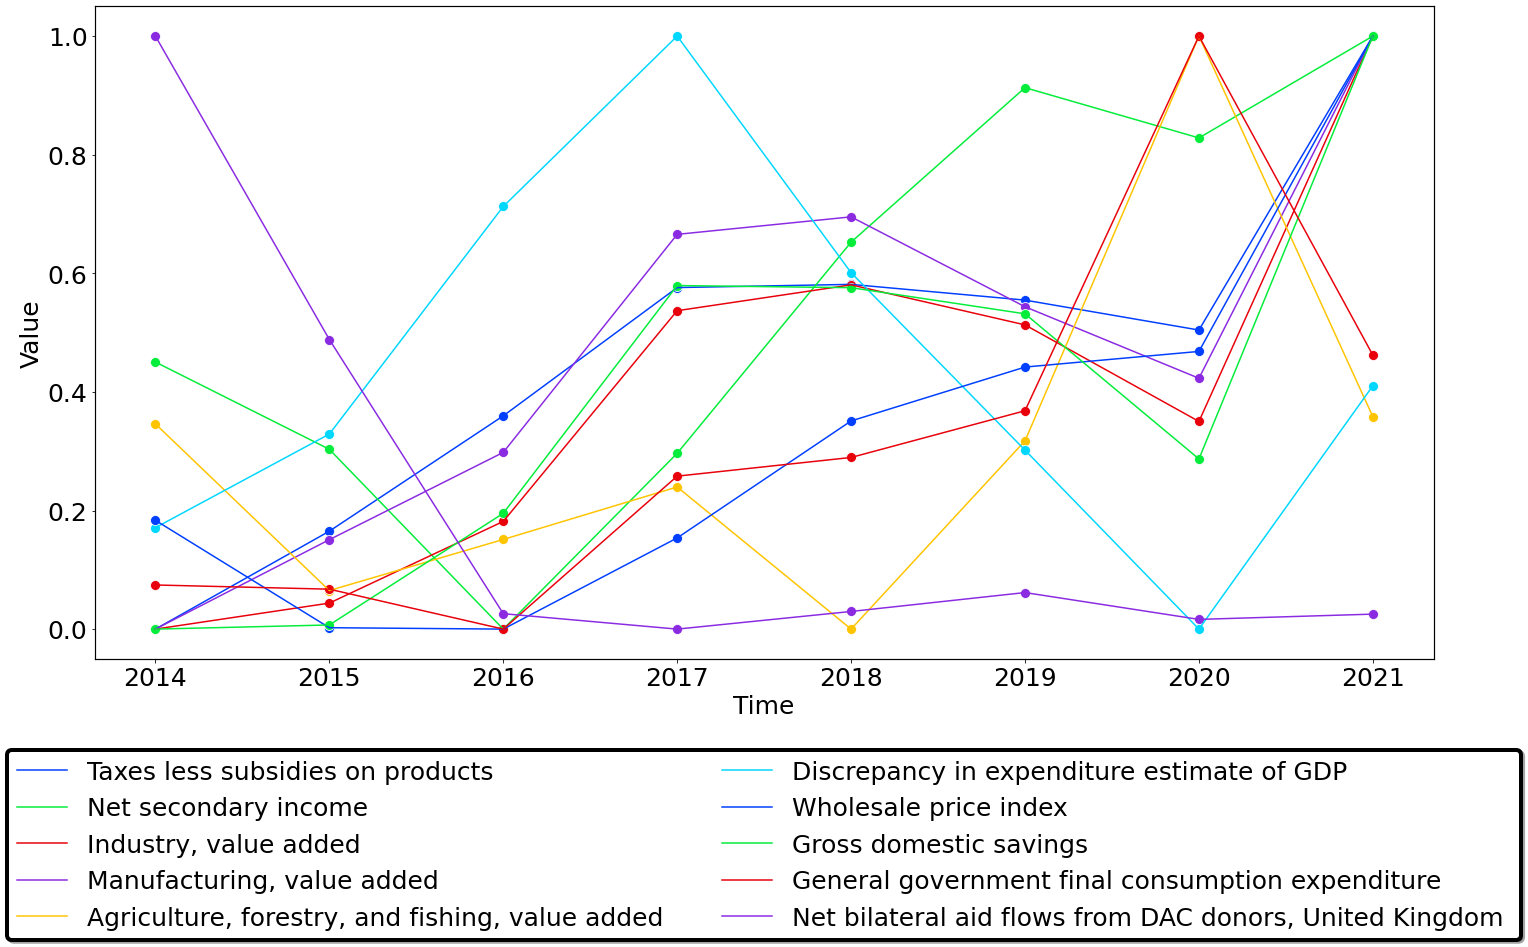

In [340]:
fig, ax = plt.subplots(1, 1, figsize=(24,12))


for ind, i in enumerate(inds):
    sns.lineplot([str(j) for j in range(2014,2014+len(df6))],df6[i], \
                 label=overwrite(df5['Indicator Name'].iloc[i].split('(')[0]))
    sns.scatterplot([str(j) for j in range(2014,2014+len(df6))],df6[i],s=100,label=None,legend=False)
    

ax.set_xlabel('Time', fontsize=25)
ax.set_ylabel('Value', fontsize=25)

#ax[0][0].set_ylabel('Proportion of authors', fontsize=15)
#ax[1][0].set_ylabel('Proportion of authors', fontsize=15)
#ax[0][1].set_ylabel('', fontsize=15)
#ax[1][1].set_ylabel('', fontsize=15)

ax.xaxis.set_tick_params(labelsize=25)
ax.yaxis.set_tick_params(labelsize=25)

legend = ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.45),
          fancybox=True, shadow=True, ncol=2, framealpha=1, frameon=True, edgecolor='black')
plt.rc('legend', fontsize=25)

legend.get_frame().set_linewidth(4)

plt.savefig("/Users/victor/Downloads/figure8.pdf",dpi=500,bbox_inches='tight')
plt.show()

In [135]:
df6 = df6[inds]
df6.columns = selected_feats

In [136]:
df6

,Taxes less subsidies on products (current US$),Net secondary income (Net current transfers from abroad) (current US$),"Industry (including construction), value added (current US$)","Manufacturing, value added (current US$)","Agriculture, forestry, and fishing, value added (% of GDP)",Discrepancy in expenditure estimate of GDP (current LCU),Wholesale price index (2010 = 100),Gross domestic savings (current US$),General government final consumption expenditure (% of GDP),"Net bilateral aid flows from DAC donors, United Kingdom (current US$)"
2014,0.000000,0.450381,0.000000,0.000000,0.346018,0.171050,0.183446,0.000000,0.074405,1.000000
2015,0.165098,0.303230,0.043850,0.150791,0.065024,0.328912,0.002365,0.006977,0.067339,0.488350
2016,0.359581,0.000000,0.181575,0.297990,0.151172,0.712643,0.000000,0.195223,0.000000,0.026011
2017,0.575944,0.296401,0.536917,0.665655,0.239704,1.000000,0.153716,0.579332,0.257927,0.000000
2018,0.581318,0.652512,0.580503,0.695149,0.000000,0.600979,0.351014,0.575752,0.289431,0.029744
2019,0.554775,0.913057,0.512996,0.543553,0.317469,0.301782,0.441892,0.531658,0.368220,0.061616
2020,0.504306,0.828272,0.350208,0.422981,1.000000,0.000000,0.468243,0.286964,1.000000,0.016388
2021,1.000000,1.000000,1.000000,1.000000,0.358166,0.410340,1.000000,1.000000,0.461936,0.025253


In [137]:
len(inds), len(selected_feats)

(10, 10)

### Feature selection type

In [138]:
#inds = inds[:2]
df4=df4.reset_index()
df4=df4.loc[:,inds]

### Estimate polynomial fit for all features

In [139]:
from sklearn.linear_model import LinearRegression
# define model
model = LinearRegression(fit_intercept=False)
# fit model
X=np.array([[1,t,t**2,t**3] for t in range(len(df4))])
model.fit(X, df4.to_numpy())

LinearRegression(fit_intercept=False)

In [140]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df4)

StandardScaler()

In [141]:
X=scaler.transform(df4)[1:,:]
X0=scaler.transform(df4)[0:1,:]

In [142]:
y0=count_df.iloc[1,1:4]
y_frac=count_df.iloc[1:,1:4]

In [143]:
# define dynamic model

from scipy import integrate

def scale(x):
  df4_t=torch.tensor(df4.values,dtype=torch.float)
  m = df4_t.mean(0, keepdim=True)
  s = df4_t.std(0, unbiased=False, keepdim=True)
  return (x-m)/s

def scale_np(x):
  df4_t=df4.values
  m = df4_t.mean(0)
  s = df4_t.std(0)
  return (x-m)/s

def dynamic_model(y, X_model, t, weights, params, bias, lambda2):
    H, E, C = y
    t_vec=torch.unsqueeze(torch.stack([t**0,t,t**2,t**3],dim=0),dim=0)
    t_vec1=torch.unsqueeze(torch.stack([(t-1)**0,t-1,(t-1)**2,(t-1)**3],dim=0),dim=0)
    dHdt = (E * params[1,0] + C * params[2,0] - H * (params[0,1] + params[0,2]) + bias[0] + lambda2*torch.dot((scale(torch.matmul(t_vec,X_model))-scale(torch.matmul(t_vec1,X_model)))[0,:],weights[0,:])) #/N #/N
    dEdt = (H * params[0,1] + C * params[2,1] - E * (params[1,0] + params[1,2]) + bias[1] + lambda2*torch.dot((scale(torch.matmul(t_vec,X_model))-scale(torch.matmul(t_vec1,X_model)))[0,:],weights[1,:])) #/N #/N
    dCdt = -dEdt - dHdt
    return torch.stack([dHdt, dEdt, dCdt],0)

def dynamic_model_np(y, X_model, t, weights, params, bias, lambda2):
    H, E, C = y
    t_vec = np.array([[1,t,t**2,t**3]])
    #t_vec=torch.unsqueeze(torch.stack([t**0,t,t**2,t**3],dim=0),dim=0)
    #t_vec1=torch.unsqueeze(torch.stack([(t-1)**0,t-1,(t-1)**2,(t-1)**3],dim=0),dim=0)
    t_vec1 = np.array([[1,t-1,(t-1)**2,(t-1)**3]])
    #dHdt = (E * params[1,0] + C * params[2,0] - H * (params[0,1] + params[0,2]) + bias[0] + lambda2*torch.dot((scale(torch.matmul(t_vec,X_model))-scale(torch.matmul(t_vec1,X_model)))[0,:],weights[0,:])) #/N #/N
    #dEdt = (H * params[0,1] + C * params[2,1] - E * (params[1,0] + params[1,2]) + bias[1] + lambda2*torch.dot((scale(torch.matmul(t_vec,X_model))-scale(torch.matmul(t_vec1,X_model)))[0,:],weights[1,:])) #/N #/N
    
    dHdt = (E * params[1,0] + C * params[2,0] - H * (params[0,1] + params[0,2]) + bias[0] + lambda2*np.matmul(scale_np(model.predict(t_vec)) - scale_np(model.predict(t_vec1))[0,:], weights[0,:]))
    dEdt = (H * params[0,1] + C * params[2,1] - E * (params[1,0] + params[1,2]) + bias[1] + lambda2*np.matmul(scale_np(model.predict(t_vec)) - scale_np(model.predict(t_vec1))[0,:], weights[1,:]))
            
    dCdt = (H * params[0,2] + E * params[1,2] - C * (params[2,0] + params[2,1]) + bias[2] + lambda2*np.matmul(scale_np(model.predict(t_vec)) - scale_np(model.predict(t_vec1))[0,:], weights[2,:])) #-dEdt - dHdt
    
    return dHdt[0], dEdt[0], dCdt[0]

def run_model(X, weights, params, bias, X0, y0, lambda2):
    t = np.arange(1, X.shape[0]+1, 1)
    sol_arr=[0]*(X.shape[0])
    t=torch.tensor(t,dtype=torch.float)
    f = lambda t, y: dynamic_model(y, torch.tensor(model.coef_.T,dtype=torch.float), t, weights, params, bias, lambda2)
    
    sol = odeint(f, y0, t)
    return sol,t

def run_model_np(X, weights, params, bias, X0, y0, lambda2):
    t = np.arange(1, X.shape[0]+1, 1)
    sol_arr=[0]*(X.shape[0])
    
    f = lambda y,t: dynamic_model_np(y, None, t, weights, params, bias, lambda2)
    
    sol = integrate.odeint(f, y0, t)
    
    return sol,t


In [144]:
X.shape, X0.shape, y0.shape, y_frac.to_numpy().shape

((7, 10), (1, 10), (3,), (7, 3))

In [145]:
features = selected_feats #[:2]
params=np.random.random((3,3))
bias=np.random.normal(size=(3,1))
weights=np.random.normal(size=(3,len(features)))

p0 = np.concatenate([params,bias,weights],1).reshape(-1,1)[:,0]
p0.shape

(42,)

In [146]:
def error_fn(real,model):
    error = real-model
    return error #np.sqrt(np.mean(error**2))

def real_mod_comp(X,p,y_frac,X0,y0,lambda2):
    
    if p.shape != (3,4+len(features)):
        p = p.reshape((3,4+len(features)))
        
    params = p[:,:3]
    bias = p[:,3]
    weights = p[:,4:]
    
    #print (X.shape, weights.shape, params.shape, bias.shape, X0.shape, y0.shape)
    
    #H,E,C,t = run_model(N, params, bias)
    
    params = np.exp(params)/np.exp(params).sum(1)[:,np.newaxis]
    
    sol,t = run_model_np(X, weights, params, bias, X0, y0, lambda2)
    
    sol = np.exp(sol)/np.exp(sol).sum(1)[:,np.newaxis]
    #sol = sol.reshape(-1,1)[:,0]
    
    #real = real.reshape(-1,1)[:,0]
    #model = np.array([H,E,C])
    #err=error_fn(real,model)
    #sol2 = np.concatenate([sol,np.repeat(sol[-1,:][np.newaxis,:],200,axis=0)],0)
    #y_frac2 = np.concatenate([y_frac,np.repeat(y_frac[-1,:][np.newaxis,:],200,axis=0)],0)
    
    err = error_fn(y_frac,sol)
    
    #if params.min() < 0 or params.max() > 1: # or sol.min() < 0 or sol.max() > 1 : # or bias.min() < 0 or bias.max() > 1 or sol.min() < 0 or sol.max() > 1:
    #    err += 10000
    
    err = np.concatenate([err, np.zeros((40,3))], 0)
    
    return err.flatten() + lambda2 * np.sqrt(np.mean(weights**2)) #err

def prediction_dm(X,p,X0,y0,lambda2):
    
    if p.shape != (3,4+len(features)):
        p = p.reshape((3,4+len(features)))
        
    params = p[:,:3]
    bias = p[:,3]
    weights = p[:,4:]
    
    #print (X.shape, weights.shape, params.shape, bias.shape, X0.shape, y0.shape)
    
    #H,E,C,t = run_model(N, params, bias)
    
    params = np.exp(params)/np.exp(params).sum(1)[:,np.newaxis]
    
    sol,t = run_model_np(X, weights, params, bias, X0, y0, lambda2)
    
    sol = np.exp(sol)/np.exp(sol).sum(1)[:,np.newaxis]
    
    return sol


In [147]:
lambda2 = 0.001

In [148]:
X.shape, X0.shape

((7, 10), (1, 10))

In [149]:
p0

array([ 0.4861376 ,  0.11080835,  0.91827972, -0.22401375, -0.08070258,
        1.69491533,  0.57389852,  0.54575503, -0.35208944,  1.17100131,
       -0.26138952,  1.18452   ,  0.31137325,  1.03948316,  0.1847726 ,
        0.07650715,  0.39277203, -0.26825211,  1.40638759, -0.48296379,
       -0.60058458,  0.60498687,  1.58970728,  0.64040346,  0.79114549,
       -0.03398328, -0.50079492, -1.5175367 ,  0.00851988,  0.50770987,
        0.79964414,  1.43465884,  0.30150503, -0.34940149,  1.01191707,
        0.09744458,  0.10912069,  0.28402983,  1.57727315, -0.32021676,
        1.70887576,  0.1912757 ])

In [150]:
real_mod_comp(X[:,:2],p0,y_frac.to_numpy(),X0[:,:2],y0.values,lambda2)

array([-0.03232223, -0.05623886,  0.0912215 ,  0.13456582,  0.04419762,
       -0.17610302,  0.23398113,  0.08046224, -0.31178295,  0.23820358,
        0.07953444, -0.3150776 ,  0.2272339 ,  0.08332591, -0.30789939,
        0.24129   ,  0.05282067, -0.29145026,  0.25642687,  0.07686943,
       -0.33063589,  0.00088681,  0.00088681,  0.00088681,  0.00088681,
        0.00088681,  0.00088681,  0.00088681,  0.00088681,  0.00088681,
        0.00088681,  0.00088681,  0.00088681,  0.00088681,  0.00088681,
        0.00088681,  0.00088681,  0.00088681,  0.00088681,  0.00088681,
        0.00088681,  0.00088681,  0.00088681,  0.00088681,  0.00088681,
        0.00088681,  0.00088681,  0.00088681,  0.00088681,  0.00088681,
        0.00088681,  0.00088681,  0.00088681,  0.00088681,  0.00088681,
        0.00088681,  0.00088681,  0.00088681,  0.00088681,  0.00088681,
        0.00088681,  0.00088681,  0.00088681,  0.00088681,  0.00088681,
        0.00088681,  0.00088681,  0.00088681,  0.00088681,  0.00

In [151]:
fn = lambda p: real_mod_comp(X,p,y_frac.to_numpy(),X0,y0.values,lambda2)
#print (p0.shape, fn(p0).shape)
    
(c,kvg) = optimize.leastsq(fn, p0) 

In [152]:
real_mod_comp(X[:,:2],c,y_frac.to_numpy(),X0[:,:2],y0.values,lambda2)

array([-0.03295997, -0.05687661,  0.09058376, -0.0179872 , -0.01113716,
        0.02987154,  0.02444358,  0.00792719, -0.03162359,  0.00612381,
        0.00386468, -0.00924131, -0.01501721,  0.00889812,  0.00686627,
       -0.00588467, -0.01888714,  0.02551898,  0.0070394 ,  0.00844241,
       -0.01473463,  0.00024906,  0.00024906,  0.00024906,  0.00024906,
        0.00024906,  0.00024906,  0.00024906,  0.00024906,  0.00024906,
        0.00024906,  0.00024906,  0.00024906,  0.00024906,  0.00024906,
        0.00024906,  0.00024906,  0.00024906,  0.00024906,  0.00024906,
        0.00024906,  0.00024906,  0.00024906,  0.00024906,  0.00024906,
        0.00024906,  0.00024906,  0.00024906,  0.00024906,  0.00024906,
        0.00024906,  0.00024906,  0.00024906,  0.00024906,  0.00024906,
        0.00024906,  0.00024906,  0.00024906,  0.00024906,  0.00024906,
        0.00024906,  0.00024906,  0.00024906,  0.00024906,  0.00024906,
        0.00024906,  0.00024906,  0.00024906,  0.00024906,  0.00

In [153]:
c = c.reshape(3,len(features)+4)

params = c[:,:3]
params = np.exp(params)/np.exp(params).sum(1)[:,np.newaxis]
bias = c[:,3]
weights = c[:,4:]

In [154]:
X0

array([[-1.65474725, -0.32061902, -1.29926544, -1.56273663,  0.12588674,
        -0.90384825, -0.46271962, -1.24800799, -0.80390647,  2.36025486]])

In [155]:
X[-1]

array([ 1.88385095,  1.35604744,  1.94276943,  1.74804252,  0.16798883,
       -0.10180286,  2.20488517,  1.89568283,  0.49146171, -0.53700018])

In [156]:
prediction_years = 4
X_future = np.repeat(X[-1][np.newaxis,:],prediction_years,axis=0)
y_future = y_frac.to_numpy()[-1]

predictions = prediction_dm(X_future,c,X0,y_future,lambda2)

In [157]:
predictions

array([[0.32114775, 0.27339649, 0.40545576],
       [0.32624246, 0.22510161, 0.44865593],
       [0.32506352, 0.2000623 , 0.47487418],
       [0.32106969, 0.18216082, 0.49676949]])

In [158]:
params

array([[0.39592785, 0.13567959, 0.46839256],
       [0.27998249, 0.1156299 , 0.60438761],
       [0.31854137, 0.31061585, 0.37084279]])

In [159]:
bias

array([ 0.20042825, -0.148212  ,  0.45709767])

In [160]:
weights

array([[ 0.10339894, -0.10665127,  0.06964013,  0.1134644 , -0.11408693,
         0.24762012, -0.08883758,  0.08514347,  0.16692839, -0.22959778],
       [-0.29229128,  0.41163672, -0.20361803, -0.27838503,  0.38441945,
        -0.57219223,  0.07210046, -0.21599447,  0.30378564,  0.37368917],
       [-0.19530299,  0.2512027 , -0.13624478, -0.19596203,  0.24621827,
        -0.39344581,  0.07522772, -0.14926833,  0.16510229,  0.29907261]])

In [161]:
y_frac

,Count_mono_hindi,Count_mono_english,Count_CM
1,0.281835,0.247191,0.470974
2,0.305764,0.222222,0.472013
3,0.348193,0.210241,0.441566
4,0.326442,0.186538,0.487019
5,0.300110,0.175800,0.524090
6,0.303083,0.133956,0.562961
7,0.309289,0.148311,0.542400


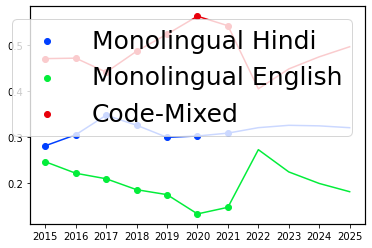

In [162]:
# ratios=[[sigmoid(i[0]),(1-sigmoid(i[0]))*sigmoid(i[1]),(1-sigmoid(i[0]))*(1-sigmoid(i[1]))] for i in ys]
# ratios+=arr
plt.plot([str(j) for j in range(2015,2015+len(y_frac)+len(predictions))],np.concatenate([y_frac.to_numpy(),predictions],0)[:,0])
plt.plot([str(j) for j in range(2015,2015+len(y_frac)+len(predictions))],np.concatenate([y_frac.to_numpy(),predictions],0)[:,1])
plt.plot([str(j) for j in range(2015,2015+len(y_frac)+len(predictions))],np.concatenate([y_frac.to_numpy(),predictions],0)[:,2])
plt.scatter([str(j) for j in range(2015,2015+len(y_frac))],y_frac['Count_mono_hindi'],label='Monolingual Hindi')
plt.scatter([str(j) for j in range(2015,2015+len(y_frac))],y_frac['Count_mono_english'],label='Monolingual English')
plt.scatter([str(j) for j in range(2015,2015+len(y_frac))],y_frac['Count_CM'],label='Code-Mixed')
plt.legend()
plt.show()

In [163]:
p = figure(height=600, width=1200, x_range=[str(j) for j in range(2015,2015+len(y_frac)+len(predictions))],y_range=[0,0.6])

p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

p.xaxis.axis_label = 'Time'
p.yaxis.axis_label = 'Proportion'

p.line([str(j) for j in range(2015,2015+len(y_frac)+len(predictions))],np.concatenate([y_frac.to_numpy(),predictions],0)[:,0], legend_label='Monolingual Hindi', line_color="violet", line_dash=[4,4],line_width=4)
p.line([str(j) for j in range(2015,2015+len(y_frac)+len(predictions))],np.concatenate([y_frac.to_numpy(),predictions],0)[:,2], legend_label='Code-mixed',line_width=4)
p.line([str(j) for j in range(2015,2015+len(y_frac)+len(predictions))],np.concatenate([y_frac.to_numpy(),predictions],0)[:,1], legend_label='Monolingual English',line_color="black", line_width=4, line_dash=[2,2])

p.circle([str(j) for j in range(2015,2015+len(y_frac)+len(predictions))],np.concatenate([y_frac.to_numpy(),predictions],0)[:,0],size=15,color='violet')
p.circle([str(j) for j in range(2015,2015+len(y_frac)+len(predictions))],np.concatenate([y_frac.to_numpy(),predictions],0)[:,2],size=15)
p.circle([str(j) for j in range(2015,2015+len(y_frac)+len(predictions))],np.concatenate([y_frac.to_numpy(),predictions],0)[:,1],size=15,color='black')

#p.xaxis.major_label_orientation = math.pi/4

lower = BoxAnnotation(left=0, right=len(y_frac), fill_alpha=0.1, fill_color='navy')
p.add_layout(lower)

lower = BoxAnnotation(left=len(y_frac), fill_alpha=0.1, fill_color='olive')
p.add_layout(lower)

#p.add_layout(p.legend[0], 'center')

p.xaxis.axis_label_text_font_style = "normal"
p.yaxis.axis_label_text_font_style = "normal"

p.legend.location = "top_left"
p.legend.click_policy="hide"

p.xaxis.axis_label_text_font_style = "normal"
p.yaxis.axis_label_text_font_style = "normal"

p.xaxis.axis_label_text_font_size = "20pt"
p.yaxis.axis_label_text_font_size = "20pt"

p.xaxis.major_label_text_font_size = "12pt"
p.yaxis.major_label_text_font_size = "12pt"

p.legend.title_text_font_size = '12pt'
 
# Increasing the labels of the box
# to 30pt
p.legend.label_text_font_size = "12pt"

label1 = Label(x=8.7, y=0.02, text='Predicted',text_font_size='15pt',angle=0)
label2 = Label(x=3.4, y=0.02, text='Actual',text_font_size='15pt',angle=-0)

p.add_layout(label1)
p.add_layout(label2)

p.output_backend = "svg"

export_svg(p, filename="/Users/victor/Downloads/figure7a.svg")

show(p)


In [164]:
bias

array([ 0.20042825, -0.148212  ,  0.45709767])

In [166]:
bias = np.exp(bias)

In [168]:
bias /= bias.sum()

In [169]:
bias

array([0.33352626, 0.23535178, 0.43112196])

In [170]:
weights.shape

(3, 10)

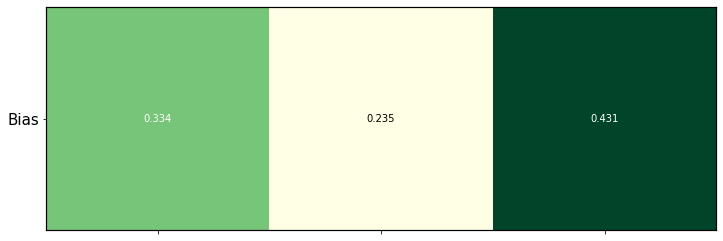

In [171]:
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(bias[np.newaxis,:],cmap='YlGn')

labels = ['Monolingual Hindi','Monolingual English','Code-mixed']
ylabel = ['Bias']

#cbar = ax.figure.colorbar(im, ax=ax, cmap='YlGn')
# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(labels)), labels=['']*len(labels))
ax.set_yticks(np.arange(len(ylabel)), labels=ylabel)

# Rotate the tick labels and set their alignment.
#plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
#         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(labels)):
    if i in [0,2]:
        text = ax.text(i,0, str(round(bias[i],3)),
                   ha="center", va="center", color="w")
    else:
        text = ax.text(i,0, str(round(bias[i],3)),
                   ha="center", va="center", color="black")

#ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)

plt.savefig("/Users/victor/Downloads/figure7c.svg",format="svg",bbox_inches='tight',dpi=500)
plt.show()

In [236]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="", use_cbar = True, rotation_angle=-30, **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    if use_cbar == True:
        cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
        cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    
    if rotation_angle == 0:
        plt.setp(ax.get_xticklabels(), rotation=rotation_angle)
    else:
        plt.setp(ax.get_xticklabels(), rotation=rotation_angle, ha="right",rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)
    
    if use_cbar == True:
        return im, cbar
    else:
        return im, None


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

In [329]:
labels

['Monolingual Hindi', 'Monolingual English', 'Code-mixed']

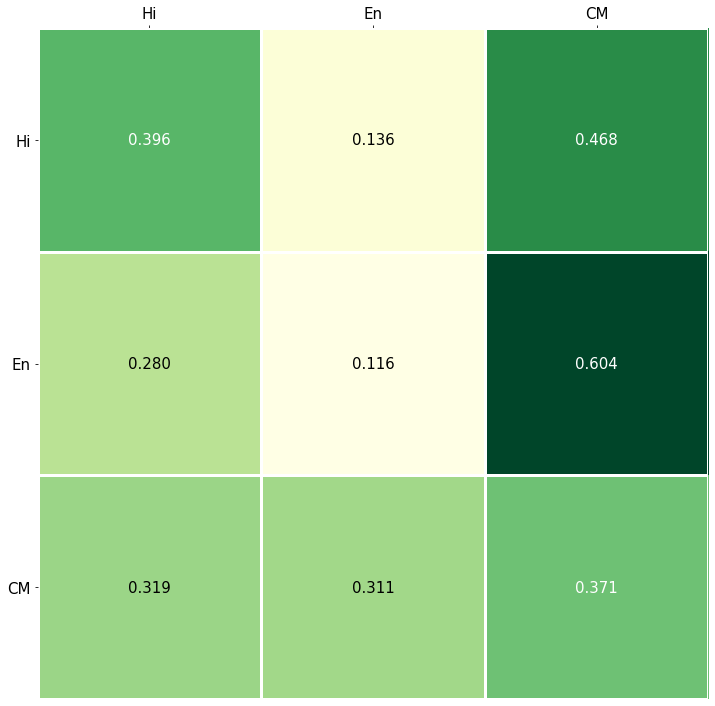

In [330]:
import matplotlib

labels = ['Hi','En','CM']

matplotlib.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(10,10))

im, cbar = heatmap(params, labels, labels, ax=ax,
                   cmap="YlGn", cbarlabel="Probability", use_cbar=False, rotation_angle=0)
texts = annotate_heatmap(im, valfmt="{x:.3f}",)

fig.tight_layout()
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)

plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = False
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = True

plt.savefig("/Users/victor/Downloads/figure7b.svg",format="svg",bbox_inches='tight',dpi=500)
plt.show()

In [238]:
selected_feats

['Taxes less subsidies on products (current US$)',
 'Net secondary income (Net current transfers from abroad) (current US$)',
 'Industry (including construction), value added (current US$)',
 'Manufacturing, value added (current US$)',
 'Agriculture, forestry, and fishing, value added (% of GDP)',
 'Discrepancy in expenditure estimate of GDP (current LCU)',
 'Wholesale price index (2010 = 100)',
 'Gross domestic savings (current US$)',
 'General government final consumption expenditure (% of GDP)',
 'Net bilateral aid flows from DAC donors, United Kingdom (current US$)']

In [240]:
selected_feats2

['Taxes less subsidies on products ',
 'Net secondary income ',
 'Industry, value added',
 'Manufacturing, value added ',
 'Agriculture, forestry, and fishing, value added ',
 'Discrepancy in expenditure estimate of GDP ',
 'Wholesale price index ',
 'Gross domestic savings ',
 'General government final consumption expenditure ',
 'Net bilateral aid flows from DAC donors, United Kingdom ']

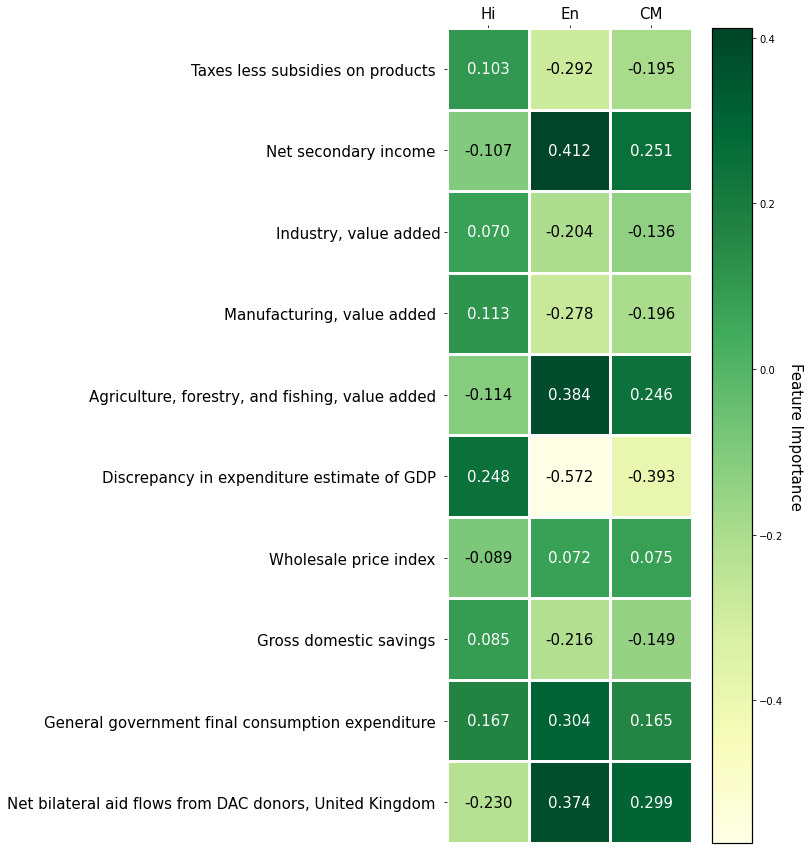

In [332]:
import matplotlib

selected_feats2 = [i.split('(')[0] for i in selected_feats] #.split(":")[0].split(",")[0]
selected_feats2 = [overwrite(i) for i in selected_feats2]
matplotlib.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(8,12))

im, cbar = heatmap(weights.T, selected_feats2, labels, ax=ax,
                   cmap="YlGn", cbarlabel="Feature Importance", rotation_angle=0)
texts = annotate_heatmap(im, valfmt="{x:.3f}",)

fig.tight_layout()
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)

plt.savefig("/Users/victor/Downloads/figure7d.pdf",bbox_inches='tight',dpi=500)
plt.show()

In [333]:
weights.shape

(3, 10)

In [334]:
corr_df.shape

(10, 3)

In [336]:
def heatmap2(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="", use_cbar = True, **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    if use_cbar == True:
        cbar = ax.figure.colorbar(im, ax=ax, location='left', **cbar_kw)
        cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")
        
        cbar.ax.yaxis.set_label_position("left")
        cbar.ax.yaxis.tick_left()
        cbar.ax.yaxis.set_ticks_position('both')

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)
    
    if use_cbar == True:
        return im, cbar
    else:
        return im, None


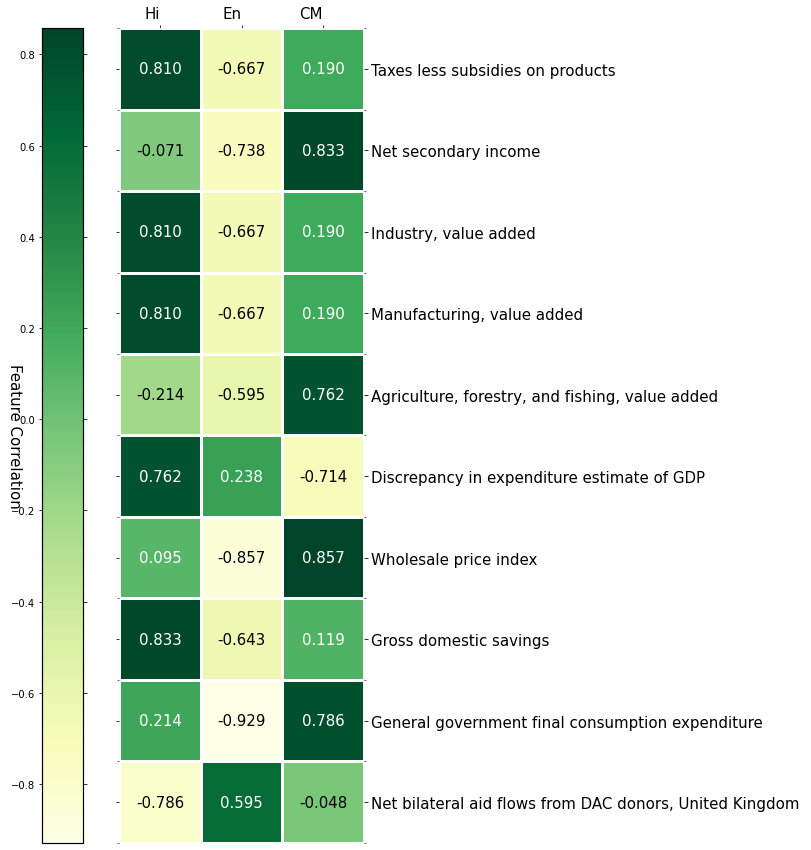

In [337]:
import matplotlib

selected_feats2 = [i.split('(')[0] for i in selected_feats] #.split(":")[0].split(",")[0]
selected_feats2 = [overwrite(i) for i in selected_feats2]

matplotlib.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(8,12))

im, cbar = heatmap2(corr_df.values, selected_feats2, labels, ax=ax,
                   cmap="YlGn", cbarlabel="Feature Correlation", use_cbar=True)
texts = annotate_heatmap(im, valfmt="{x:.3f}",)

ax.yaxis.set_label_position("right")
fig.tight_layout()
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)

ax.yaxis.tick_right()
ax.yaxis.set_ticks_position('both')

plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = False
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = True

plt.savefig("/Users/victor/Downloads/figure7d2.pdf",bbox_inches='tight',dpi=500)
plt.show()